In [2]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Bootstrap review: Santa Barbara County Salaries in 2020

[Government Compensation in California](https://publicpay.ca.gov/Reports/Counties/County.aspx?entityid=42&year=2020)
Let's look at how much Santa Barbara County employees got paid in 2020.

In [4]:
sb_pop = Table.read_table('data/santabarbara-county-salaries-2020.csv').where('TotalWages', are.above(10000))
sb_pop = sb_pop.where('TotalWages', are.above(10*40*52))#.sort('TotalWages')
pop_median = percentile(50, sb_pop.column('TotalWages'))
print("Population median is $", pop_median)

our_sample = sb_pop.sample(300, with_replacement = False)
#sb_pop.sort('TotalWages', descending = True)
#our_sample
sb_pop

Population median is $ 77666


Year,EmployerType,EmployerName,DepartmentOrSubdivision,Position,ElectedOfficial,Judicial,OtherPositions,MinPositionSalary,MaxPositionSalary,ReportedBaseWage,RegularPay,OvertimePay,LumpSumPay,OtherPay,TotalWages,DefinedBenefitPlanContribution,EmployeesRetirementCostCovered,DeferredCompensationPlan,HealthDentalVision,TotalRetirementAndHealthContribution,PensionFormula,EmployerURL,EmployerPopulation,LastUpdatedDate,EmployerCounty,SpecialDistrictActivities,IncludesUnfundedLiability,SpecialDistrictType
2020,County,Santa Barbara,Fire,Fire Captain Shift,False,False,nan,75841,91368,nan,108424,318368,0,22086,448878,48865,0,0,26883,75748,3% @ 55,http://co.santa-barbara.ca.us/hr,441172,10/08/2021,Santa Barbara,nan,False,nan
2020,County,Santa Barbara,Fire,Fire Captain Shift,False,False,nan,75841,91368,nan,125587,246957,0,32565,405109,51306,0,0,0,51306,3% @ 55,http://co.santa-barbara.ca.us/hr,441172,10/08/2021,Santa Barbara,nan,False,nan
2020,County,Santa Barbara,Fire,Fire Engineering Inspector Shift,False,False,nan,66379,79810,nan,107884,264208,0,20778,392870,44560,0,0,11785,56345,3% @ 55,http://co.santa-barbara.ca.us/hr,441172,10/08/2021,Santa Barbara,nan,False,nan
2020,County,Santa Barbara,Fire,Fire Captain Staff,False,False,nan,106182,127918,nan,121238,188530,0,20266,330034,47138,0,0,14310,61448,3% @ 55,http://co.santa-barbara.ca.us/hr,441172,10/08/2021,Santa Barbara,nan,False,nan
2020,County,Santa Barbara,Public Health,Staff Physician,False,False,nan,204108,233101,nan,221535,53160,0,34332,309027,10506,0,0,17954,28460,2% @ 62,http://co.santa-barbara.ca.us/hr,441172,10/08/2021,Santa Barbara,nan,False,nan
2020,County,Santa Barbara,County Executive Office,County Executive Officer,False,False,nan,0,0,nan,280559,0,0,7800,288359,44339,0,5000,11869,61208,2% @ 57,http://co.santa-barbara.ca.us/hr,441172,10/08/2021,Santa Barbara,nan,False,nan
2020,County,Santa Barbara,Fire,Fire Captain Shift,False,False,nan,75841,91368,nan,104497,160917,0,21329,286743,45988,0,0,23076,69064,3% @ 55,http://co.santa-barbara.ca.us/hr,441172,10/08/2021,Santa Barbara,nan,False,nan
2020,County,Santa Barbara,Sheriff,Sheriffs Commander,False,False,nan,159576,192824,nan,167993,108377,0,10291,286661,71373,0,0,31926,103299,3% @ 50,http://co.santa-barbara.ca.us/hr,441172,10/08/2021,Santa Barbara,nan,False,nan
2020,County,Santa Barbara,Fire,Team/Project Leader-Battalion Chief Staff,False,False,nan,118134,173185,nan,130341,131884,0,22632,284857,54525,0,351,25438,80314,3% @ 55,http://co.santa-barbara.ca.us/hr,441172,10/08/2021,Santa Barbara,nan,False,nan
2020,County,Santa Barbara,Fire,Fire Captain Shift,False,False,nan,75841,91368,nan,120097,149652,0,11135,280884,45299,0,0,15520,60819,3% @ 55,http://co.santa-barbara.ca.us/hr,441172,10/08/2021,Santa Barbara,nan,False,nan


In [5]:
def one_bootstrap_median():
    single_sample = our_sample.sample()
    return percentile(50, single_sample.column('TotalWages'))

med_bins = np.arange(50000, 100001, 2500)
med_bins

array([ 50000,  52500,  55000,  57500,  60000,  62500,  65000,  67500,
        70000,  72500,  75000,  77500,  80000,  82500,  85000,  87500,
        90000,  92500,  95000,  97500, 100000])

In [6]:
help(Table.sample)

Help on function sample in module datascience.tables:

sample(self, k=None, with_replacement=True, weights=None)
    Return a new table where k rows are randomly sampled from the
    original table.
    
    Args:
        ``k`` -- specifies the number of rows (``int``) to be sampled from
           the table. Default is k equal to number of rows in the table.
    
        ``with_replacement`` -- (``bool``) By default True;
            Samples ``k`` rows with replacement from table, else samples
            ``k`` rows without replacement.
    
        ``weights`` -- Array specifying probability the ith row of the
            table is sampled. Defaults to None, which samples each row
            with equal probability. ``weights`` must be a valid probability
            distribution -- i.e. an array the length of the number of rows,
            summing to 1.
    
    Raises:
        ValueError -- if ``weights`` is not length equal to number of rows
            in the table; or, if ``weig

/opt/conda/lib/python3.7/site-packages/datascience/tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


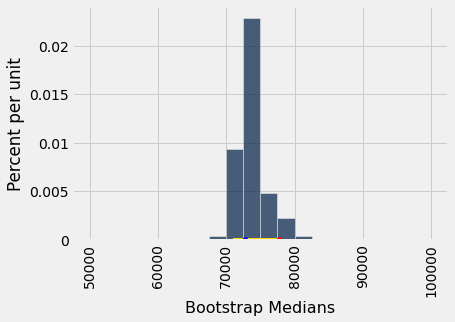

In [7]:
## Let's do the whole process, all at once: 
## 1. take a sample, 

our_sample = sb_pop.sample(300, with_replacement = False)
our_sample_median = percentile(50, our_sample.column('TotalWages'))


## 2. use it to make many bootstrap samples,

bootstrap_medians = make_array()
for i in np.arange(201):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)


## 3. and use the middle 95% of the bootstrap medians as our confidence interval

left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)

Table().with_column('Bootstrap Medians', bootstrap_medians).hist('Bootstrap Medians', bins=med_bins)
plots.plot([left, right], [0,0], color="gold",lw=4, zorder=1);
plots.scatter(pop_median, 0, color="red", zorder=2);
plots.scatter(our_sample_median, 0, color="blue", zorder=2);

## Bootstrap Review: Mean Maternal Age

In [8]:
births = Table.read_table('data/baby.csv')
births.show(5)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


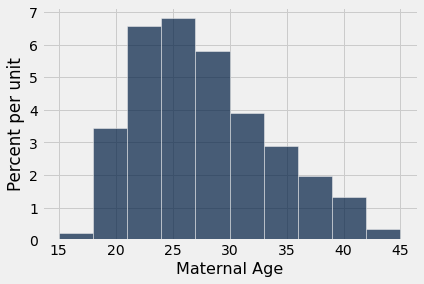

In [9]:
births.hist('Maternal Age')

In [10]:
mean_age = np.mean(births.column('Maternal Age'))
mean_age

27.228279386712096

In [11]:
def one_bootstrap_mean():
    return np.mean(births.sample().column('Maternal Age'))

In [12]:
bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)
    
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

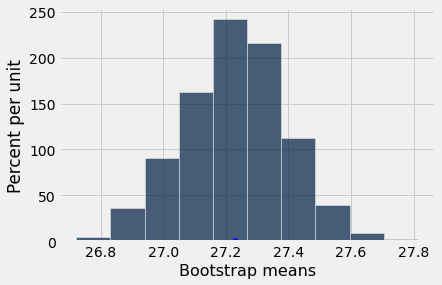

In [13]:
Table().with_column('Bootstrap means', bootstrap_means).hist()
plots.plot([left,right], [0,0], color="gold", lw=3, zorder=1);
plots.scatter(mean_age,0,color="blue", zorder=2);

## Average (Mean) ##

In [14]:
values = make_array(2, 3, 3, 9)

In [15]:
sum(values)/len(values)

4.25

In [16]:
np.average(values)

4.25

In [17]:
np.mean(values)

4.25

In [18]:
(2 + 3 + 3 + 9)/4

4.25

In [19]:
2*(1/4) + 3*(2/4) + 9*(1/4)

4.25

In [20]:
values_table = Table().with_columns('value', values)
values_table

value
2
3
3
9


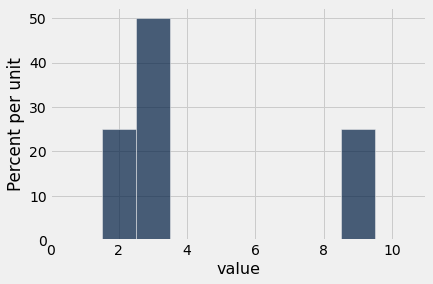

In [21]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist(0, bins = bins_for_display)

In [22]:
## Make array of 10 2s, 20 3s, and 10 9s

new_vals = make_array(2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                      9, 9, 9, 9, 9, 9, 9, 9, 9, 9)

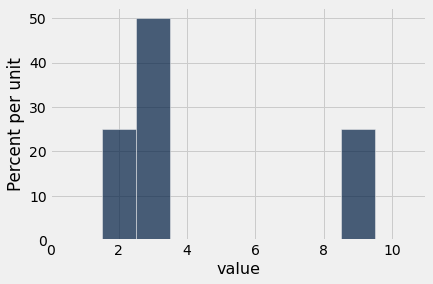

In [23]:
Table().with_column('value', new_vals).hist(bins = bins_for_display)

In [24]:
np.average(values)

4.25

In [25]:
np.average(new_vals)

4.25

### Discussion Question

In [31]:
nba = Table.read_table('data/nba2013.csv')
nba
# grab row with shortest player info
nba.sort('Height', descending = False)
# look at tallest players
nba.sort('Height', descending = True)

Name,Position,Height,Weight,Age in 2013
Hasheem Thabeet,Center,87,263,26
Roy Hibbert,Center,86,278,26
Alex Len,Center,85,255,20
Rudy Gobert,Center,85,235,21
Meyers Leonard,Center,85,250,21
Timofey Mozgov,Center,85,250,27
Marc Gasol,Center,85,265,28
Spencer Hawes,Center,85,245,25
Tyson Chandler,Center,85,235,30
Pau Gasol,Forward,84,250,33


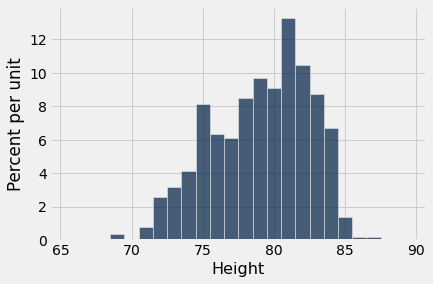

In [27]:
nba.hist('Height', bins=np.arange(65.5, 90.5))

In [28]:
heights = nba.column('Height')
percentile(50, heights) # this is median

80

In [29]:
np.average(heights)

79.06534653465347

## Standard Deviation ##

In [32]:
sd_table = Table().with_columns('Value', values)
sd_table

Value
2
3
3
9


In [33]:
average_value = np.average(sd_table.column(0))
average_value

4.25

In [34]:
deviations = values - average_value
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

Value,Deviation
2,-2.25
3,-1.25
3,-1.25
9,4.75


In [35]:
sum(deviations)

0.0

In [36]:
sd_table = sd_table.with_columns('Squared Deviation', deviations ** 2)
sd_table

Value,Deviation,Squared Deviation
2,-2.25,5.0625
3,-1.25,1.5625
3,-1.25,1.5625
9,4.75,22.5625


In [37]:
# Variance of the data

variance = np.mean(sd_table.column('Squared Deviation'))
variance

7.6875

In [38]:
# Standard Deviation (SD) is the square root of the variance

sd = variance ** 0.5
sd

2.7726341266023544

In [39]:
np.std(values)

2.7726341266023544